# DO - Left handed People really die young?


- This study aims to tackle this question, Their was a study done in 90's where it was concluded that left-hander's die approx 9 yrs younger than Right-hander's.

- Why this Study?

  - This has been a long standing case where left hander's are always attached to a negative stigma. They die young than Left hander's has been a long standing one, we take two dataset one is the count of left hander's taken in 1986. The other data is of 1999 US Death of single's, We will use various techniques like feature engineering, Baye's Theorem etc.
  - Here is a video to understand Baye's Theorem before starting with this study: https://www.youtube.com/watch?v=HZGCoVF3YvM&t=1s

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
left_h = pd.read_csv('lh_data.csv')
left_h.head()

,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906


In [ ]:
left_h.isna().sum()/len(left_h)*100

Age           0.0
Male          0.0
Female        0.0
birth_year    0.0
Mean_lh       0.0
dtype: float64

In [ ]:
left_h.describe()

,Age,Male,Female
count,77.000000,77.000000,77.000000
mean,48.000000,11.549122,9.120522
std,22.371857,3.138912,2.505480
min,10.000000,4.885999,4.680948
25%,29.000000,8.562868,6.604398
50%,48.000000,12.717558,9.892073
75%,67.000000,14.209302,11.368353
max,86.000000,15.546784,12.872166


Text(0, 0.5, 'Gender')

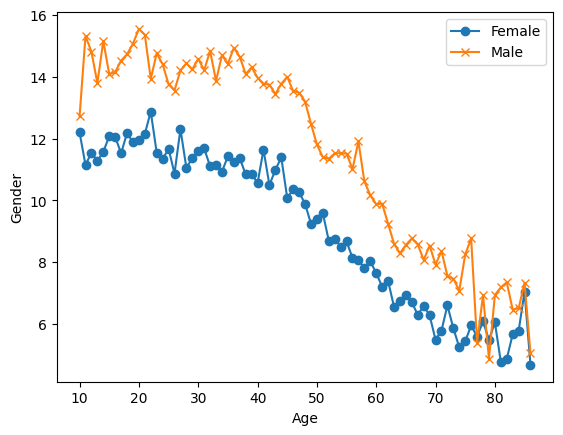

In [ ]:
fig, a = plt.subplots()
a.plot('Age', 'Female', data=left_h, marker = 'o') # plot "Female" vs. "Age"
a.plot('Age', 'Male', data=left_h, marker = 'x') # plot "Male" vs. "Age"
a.legend() # add a legend
a.set_xlabel('Age')
a.set_ylabel('Gender')


- As this data was recorded in 1986, we will find the people who were alive after 1986.

In [ ]:
left_h['birth_year'] = 1986 - left_h['Age']
left_h['Mean_lh'] = left_h[['Female', 'Male']].mean(axis = 1)

Text(0, 0.5, 'Percentage left-handed')

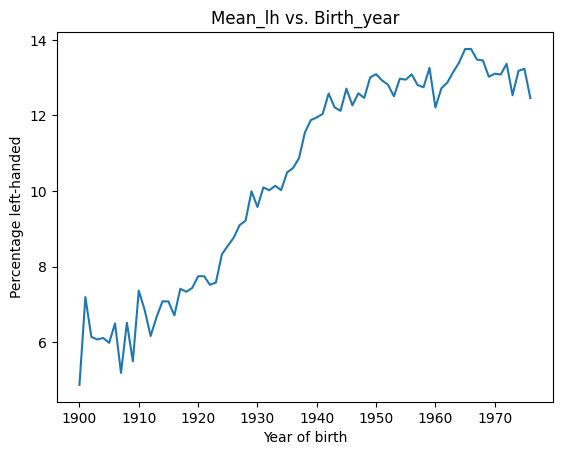

In [ ]:
fig, ax = plt.subplots()
ax.plot(left_h['birth_year'], left_h['Mean_lh']) # Access columns using []
plt.title('Mean_lh vs. Birth_year')
ax.set_xlabel("Year of birth")
ax.set_ylabel("Percentage left-handed")

- The percentage of left hadner's has increased dramatlically after 1920's.

### Why we need Baye's Rule

The probability of dying at a certain age given that you're left-handed is not equal to the probability of being left-handed given that you died at a certain age. This inequality is why we need Bayes' theorem, a statement about conditional probability which allows us to update our beliefs after seeing evidence.

We want to calculate the probability of dying at age A given that you're left-handed. Let's write this in shorthand as P(A | LH). We also want the same quantity for right-handers: P(A | RH).


$P(A|LH) = \frac{P(LH|A)*P(A)}{P(LH)} $


- P(LH | A) is the probability that you are left-handed given that you died at age A.
- P(A) is the overall probability of dying at age A, and P(LH) is the overall probability of being left-handed.
- We will now calculate each of these three quantities, beginning with P(LH | A).

To calculate P(LH | A) for ages that might fall outside the original data, we will need to extrapolate the data to earlier and later years. Since the rates flatten out in the early 1900s and late 1900s, we'll use a few points at each end and take the mean to extrapolate the rates on each end. The number of points used for this is arbitrary, but we'll pick 10 since the data looks flat-ish until about 1910.

#### P_lh_given_A

In [ ]:
def P_lh_given_A(ages_of_death, study_year = 1990):
    """ P(Left-handed | age of death), calculated based on the reported rates of left-handedness.
    Inputs: age of death, study_year
    Returns: probability of left-handedness given that a subject died in `study_year` at age `age_of_death` """

    # Use the mean of the 10 neighbouring points for rates before and after the start
    early_1900s_rate = left_h['Mean_lh'][-10:].mean()
    late_1900s_rate = left_h['Mean_lh'][:10].mean()
    middle_rates = left_h.loc[left_h['birth_year'].isin(study_year - ages_of_death)]['Mean_lh']

    youngest_age = study_year - 1986 + 10 # the youngest age in the NatGeo dataset is 10
    oldest_age = study_year - 1986 + 86 # the oldest age in the NatGeo dataset is 86

    P_return = np.zeros(ages_of_death.shape)  # create an empty array to store the results
    # extract rate of left-handedness for people of age age_of_death
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100

    return P_return


we can use data that gives the number of people who died in a given year and how old they were to create a distribution of ages of death. If we normalize the numbers to the total number of people who died, we can think of this data as a probability distribution that gives the probability of dying at age A. The data we'll use for this is from the entire US for the year 1999 - the closest I could find for the time range we're interested in.

In [ ]:
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(data_url_2, sep = '\t', skiprows=[1])


In [ ]:
death_distribution_data.head()

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0


In [ ]:
death_distribution_data.isna().sum()/len(death_distribution_data)*100
# As their is not huge percentage of data missing we will remove these values

Age           0.0
Both Sexes    4.0
Male          8.0
Female        4.0
dtype: float64

In [ ]:
death_distribution_data = death_distribution_data.dropna(subset = ["Both Sexes"])

Text(0, 0.5, 'Number of people who died')

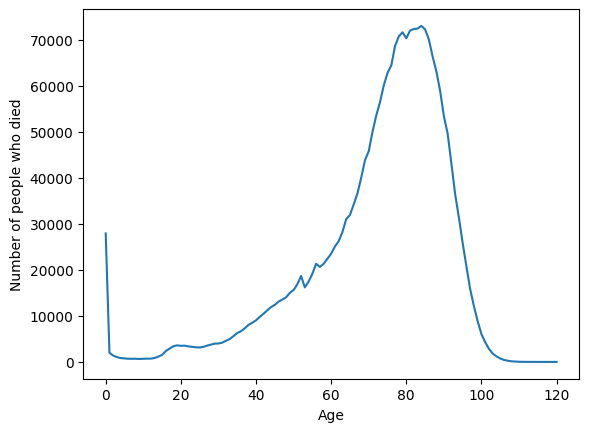

In [ ]:
# Let's see the distribution for the same data
fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data)
ax.set_xlabel("Age")
ax.set_ylabel("Number of people who died")

Overall probability of being left-handed if you died in the study year

$ P(LH) =  \frac{\sum_{A}P(LH|A)*N(A)}{\sum_{A}N(A)} $
    
    P_lh = P(LH | Age of death) P(Age of death) + P(LH | not A) P(not A) = sum over ages
    Input: dataframe of death distribution data
    Output: P(LH), a single floating point number

#### P_lh

In [ ]:
def P_lh(death_distribution_data, study_year = 1990): # sum over P_lh for each age group

    p_list = death_distribution_data['Both Sexes']*P_lh_given_A(death_distribution_data['Age'], study_year)
    #print(p_list)
    p = np.sum(p_list)
    return p/np.sum(death_distribution_data['Both Sexes']) # normalize to total number of people in distribution

print(P_lh(death_distribution_data))

0.07766387615350638


### Let's calculate Prabability Dying at certain age given that the one is left handed & Right handed

In [ ]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) # use P_lh function to get probability of left-handedness overall
    P_lh_A = P_lh_given_A(ages_of_death, study_year) # use P_lh_given_A to get probability of left-handedness for a certain age
    return P_lh_A*P_A/P_left

$P(A|RH) = \frac{P(RH|A)*P(A)}{P(RH)}$

In [ ]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're right-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1- P_lh(death_distribution_data, study_year) # either you're left-handed or right-handed, so these sum to 1
    P_rh_A = 1-P_lh_given_A(ages_of_death, study_year) # these also sum to 1
    return P_rh_A*P_A/P_right

Checking the distibution for these conditoinal probabilities

- Now that we have functions to calculate the probability of being age A at death given that you're left-handed or right-handed, let's plot these probabilities for a range of ages of death from 6 to 120.

Text(0, 0.5, 'Probability of being age A at death')

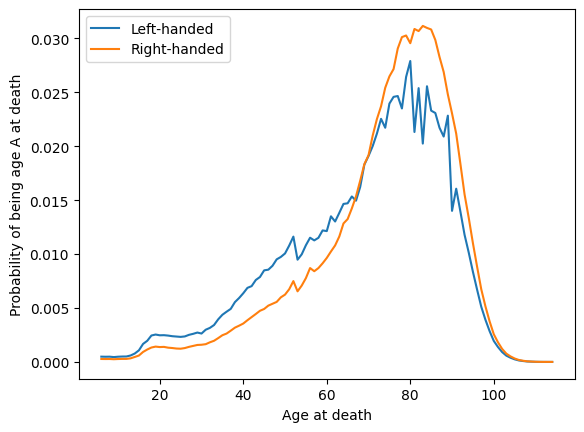

In [ ]:
ages = np.arange(6,115,1) # make a list of ages of death to plot

# for each age, calculate the probability of being left- or right-handed
left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

fig, ax = plt.subplots()
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handed")
ax.legend()
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

In [ ]:
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

print(round(average_lh_age,1))
print(round(average_rh_age,1))

print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

67.2
72.8
The difference in average ages is 5.5 years.


### Conclusion

- The Gap is big but not 9 years we hypothisezed earlier.
- The gap is not quite correct as the changing rates of left-handedness in the population.
- Some case which might be responsible for this:
    
        - We used death distribution data from almost ten years after the study (1999 instead of 1991),
        and we used death data from the entire United States instead of California alone (which was the original study).

        - We extrapolated the left-handedness survey results to older and younger age groups,
        but it's possible our extrapolation wasn't close enough to the true rates for those ages.